In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import math

### Measure of Central Tendency
1. Mean
2. Median
3. Mode

In [34]:
ages = [23,24,32,45,12,43,67,45,32,56,32,120]

In [4]:
# Finding Mean & Median via Numpy Library.

print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [6]:
# We can also find Mean & Median via Statistics Library.

print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [10]:
# ages.sort()

In [11]:
# Findind Mode via Statistics Library.

statistics.mode(ages)

32

<AxesSubplot: >

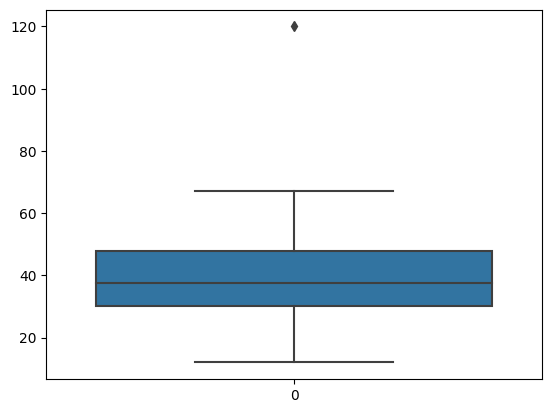

In [17]:
## Finding Outlier

sns.boxplot(ages)

### Number Summary

In [26]:
# To Find q1 And q3 in Dataset...
# Where, q1 is 25 Percentile And q3 is 75 percentile

q1, q3 = np.percentile(ages, (25, 75))

In [27]:
print(f"q1 is {q1} and q3 is {q3}")

q1 is 30.0 and q3 is 47.75


In [28]:
# To check outlier [Lower Fence - Higher Fence]
# Where IQR is Inter Quantile Range.

IQR = q3 - q1
lower_fence = q1 - 1.5*(IQR)
higher_fence = q3 + 1.5*(IQR)
print(f"Lower Fence is {lower_fence} and Higher Fence is {higher_fence}")

Lower Fence is 3.375 and Higher Fence is 74.375


### Measure Of Dispersion
1. Variance
2. Standard Deviation

In [62]:
# In Statistics Library Variance are Comes via sample Variances Formuala

statistics.variance(ages)

795.2954545454545

In [63]:
# In Numpy Library Variance are comes via Population Variances Formula.

np.var(ages)

729.0208333333334

In [64]:
variance(ages)

729.0208333333334

In [58]:
# We are Approaching Manual Step to Find Population Variance
def variance(data):
    n = len(ages)
    # mean of the data
    mean = sum(data)/n
    # Variance
    deviation = [(x - mean) ** 2 for x in data]
    # print(deviation)
    variance = sum(deviation)/n
    # here we are using Population Variance formula
    return variance

In [59]:
variance(ages)

729.0208333333334

In [71]:
# Now, We are doing Manual Approaching for Finding Variances with Degree of Freedom (dof) method.
## Where dof = 0 means it is Population variances.
## Where dof = 1 means it is sample variances.
def variance(data, dof = 0):
    n = len(ages)
    ## mean of the data
    mean = sum(data)/n
    ## Variance
    deviation = [(x - mean) ** 2 for x in data]
    variance = sum(deviation)/(n- dof)
    ## here we are using Sample Variance Formula.
    return variance

In [72]:
# here we are finding Population Variance with dof =0
variance(ages,dof =0)

729.0208333333334

In [73]:
# here we are finding Sample Variance with dof =1.
variance(ages,dof =1)

795.2954545454545

In [74]:
# In Statistics Library , we are finding sample Variance as below :-
statistics.variance(ages)

795.2954545454545

In [75]:
# In Statistics Library, we are finding Population Variance as below :-
statistics.pvariance(ages)

729.0208333333334

In [78]:
# For Finding Standard Deviation in statistics we use Maath Library.

math.sqrt(statistics.pvariance(ages))

27.000385799712813

### Histograms And PDF

<AxesSubplot: ylabel='Count'>

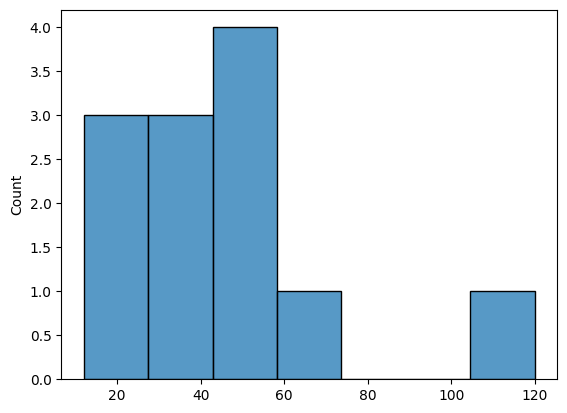

In [80]:
sns.histplot(ages)

<AxesSubplot: ylabel='Count'>

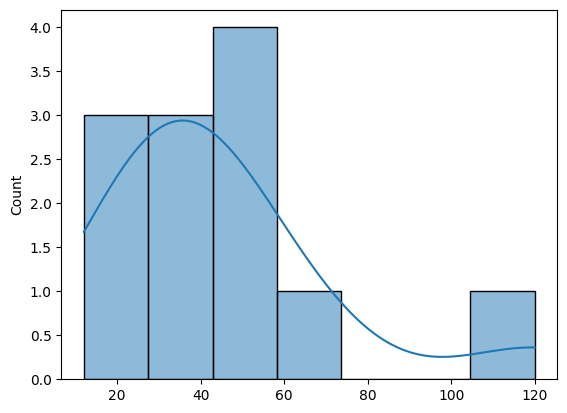

In [82]:
sns.histplot(ages, kde = True)  # Where Kde = kernal density Estimators

In [84]:
# Now, we check practical with some dataset:-
df = sns.load_dataset('iris')

In [85]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

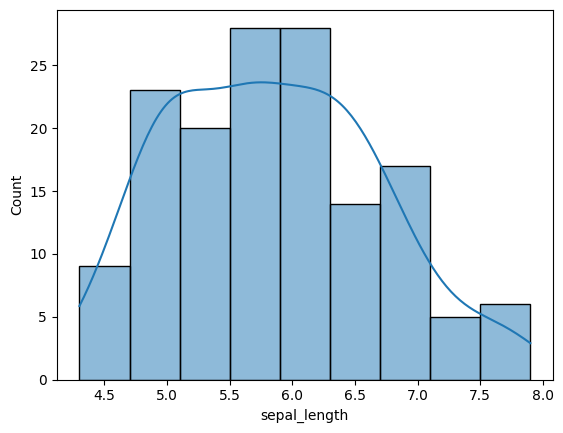

In [87]:
sns.histplot(df['sepal_length'], kde = True)

<AxesSubplot: xlabel='sepal_width', ylabel='Count'>

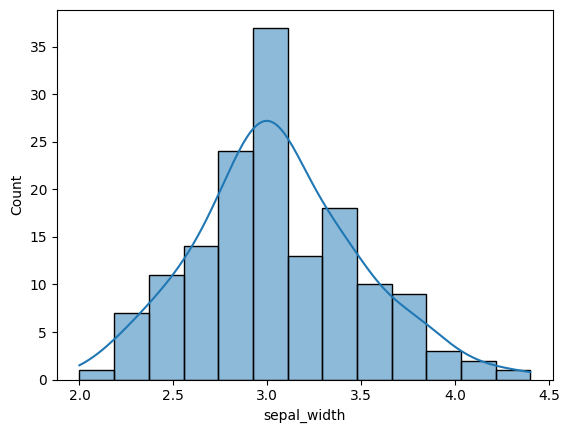

In [89]:
sns.histplot(df['sepal_width'], kde = True)

<AxesSubplot: xlabel='petal_length', ylabel='Count'>

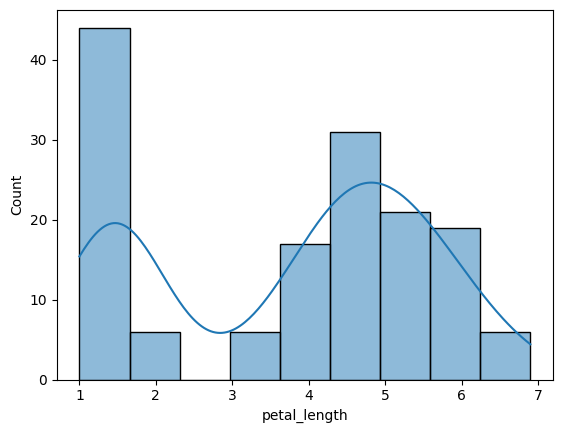

In [91]:
sns.histplot(df['petal_length'], kde = True)

<AxesSubplot: xlabel='petal_width', ylabel='Count'>

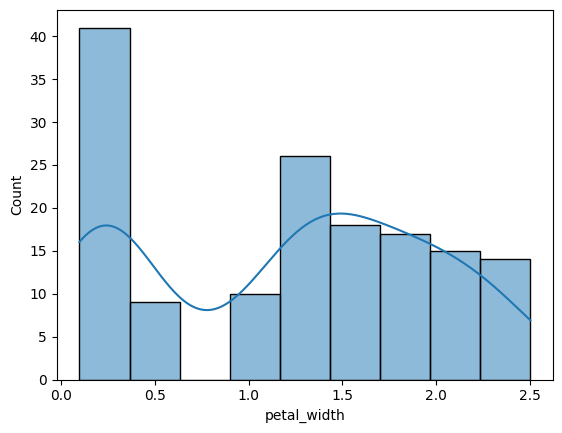

In [92]:
sns.histplot(df['petal_width'], kde = True)

In [93]:
# How to Create a Normal Distributed Data with the help of Numpy.
s = np.random.normal(0.5,0.2,1000)

<AxesSubplot: ylabel='Count'>

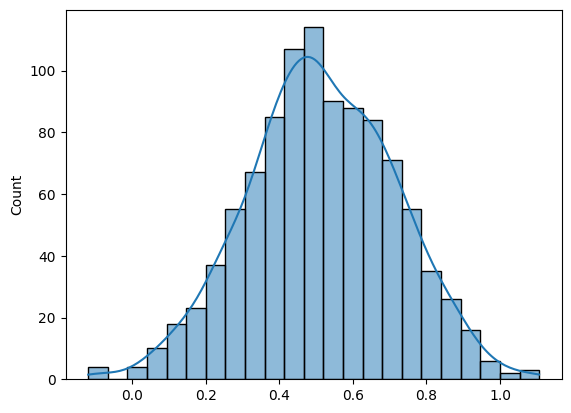

In [95]:
# Histogram Plot for Normal Distribution dataset
sns.histplot(s, kde = True)

### Other Distribution
1. Log Normal Distribution
2. Power Law distribution
3. Log Normal Distribution
4. Power Law distribution

In [96]:
# To Find Log Normal Distributions:-
mu, sigma = 3., 1.
## Where mu is Means and sigma is Standard deviation.
s = np.random.lognormal(mu, sigma, 100)

<AxesSubplot: ylabel='Count'>

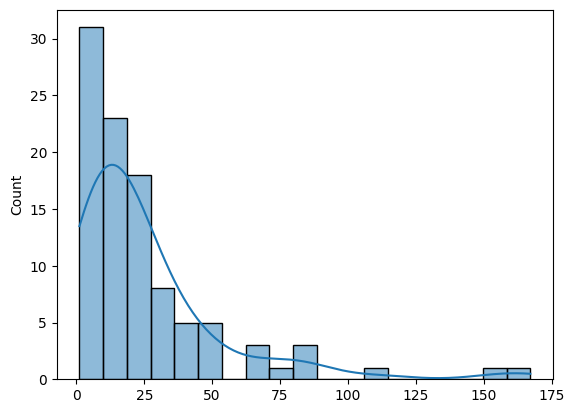

In [98]:
# Histogram Plot for Log Normal Distribution dataset
sns.histplot(s, kde = True)

<AxesSubplot: ylabel='Count'>

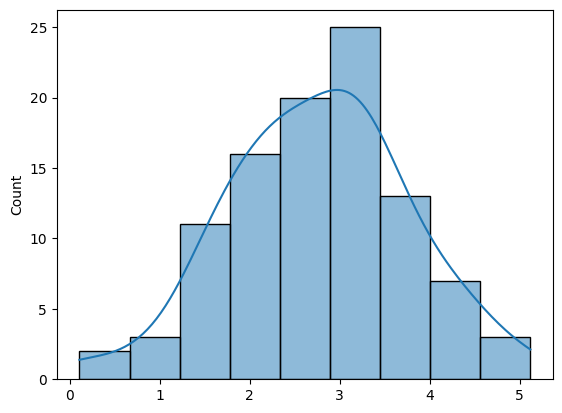

In [100]:
sns.histplot(np.log(s), kde = True)

### Check Whether Distribution is Normal Distribution or not.

In [101]:
# If you want to check whether feature is Guassian or Normal distribution .
## Q-Q Plot
import scipy.stats as stat
import pylab

def plot_data(sample):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample, dist='norm', plot = pylab)
    plt.show()

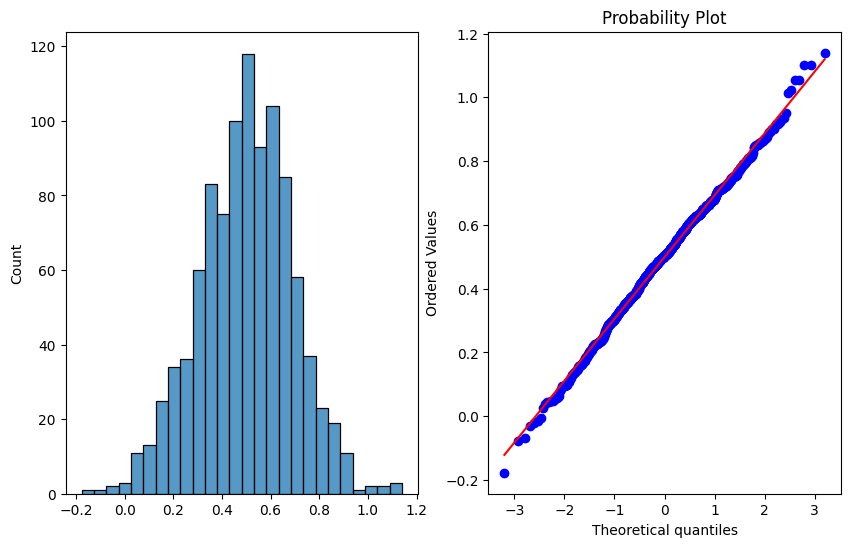

In [102]:
# Creating a Normal Distributed data:-
s = np.random.normal(0.5, 0.2, 1000)
plot_data(s)
# Here, in below Result data comes in a straight line of Probability Plot, so it is a Normal Distribution.

<AxesSubplot: xlabel='sepal_width', ylabel='Count'>

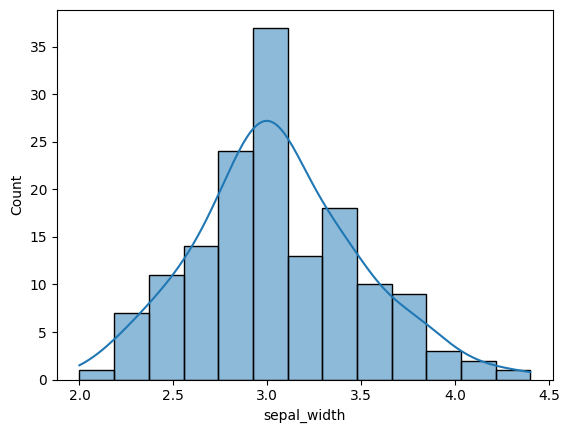

In [103]:
sns.histplot(df['sepal_width'], kde= True)

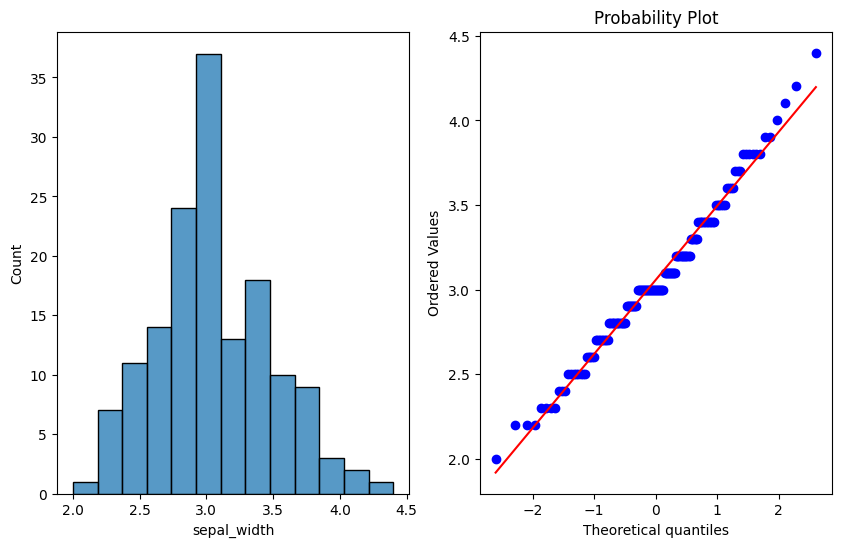

In [104]:
# Here, in below Result data comes in a straight line of Probability Plot, so it is a Normal Distribution.
plot_data(df['sepal_width'])

### Check Whether Distribution is Log Normal Distribution or not.

In [105]:
# To Find Log Normal Distributions:-
mu, sigma = 3., 1.
## Where mu is Means and sigma is Standard deviation.
sample = np.random.lognormal(mu, sigma, 100)

In [107]:
def plot_data(sample):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample), dist='norm', plot = pylab)
    plt.show

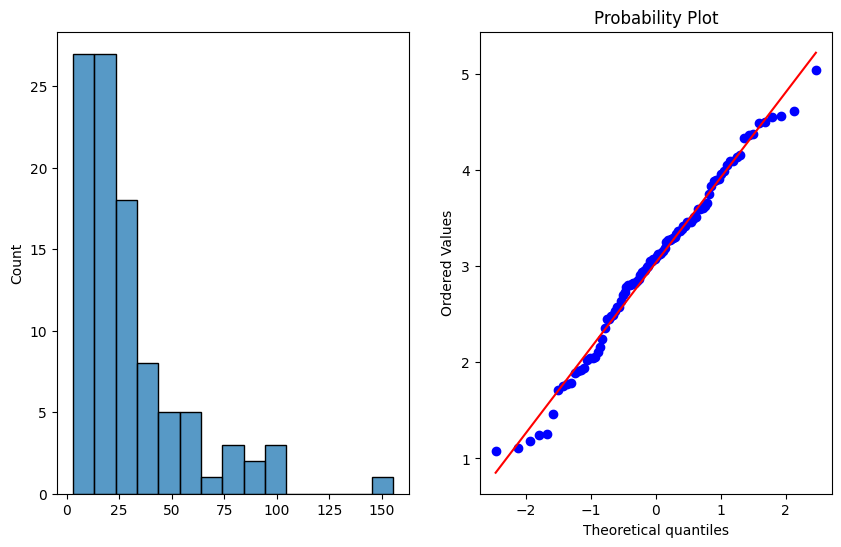

In [108]:
# Here, in below Result data comes in a straight line of Probability Plot, so it is a Log Normal Distribution.
plot_data(sample)

### Pearson and Sperman Rank Correlation

In [109]:
# For Practicing we are taking Tips Dataset:-
df = sns.load_dataset('tips')

In [110]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [113]:
# In Pandas Dafault, Corr() takes Pearson Correlation:-
df.corr()

/tmp/ipykernel_6577/621836548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


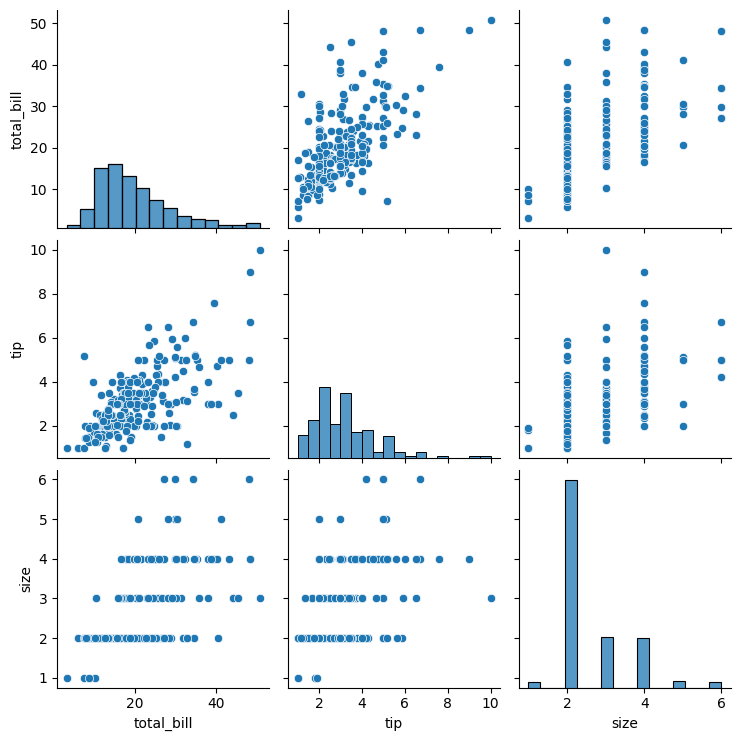

In [114]:
# To Check Pearson Correlation in Diagramatically format, we use.
sns.pairplot(df)